In [13]:
from sklearn import linear_model 
from sklearn.linear_model import Lasso 
from sklearn.metrics import mean_squared_error

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
insurance_data = pd.read_csv("insurance.csv")
insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [9]:
X=insurance_data.drop(columns=["charges"])
Y=insurance_data["charges"]

X=pd.get_dummies(X,columns=["region"],drop_first=True,dtype=int)

X["sex"] = X["sex"].map({"female": 1, "male": 0})
X["smoker"] = X["smoker"].map({"yes": 1, "no": 0})

X["age_smoker"]=X["age"]*X["smoker"]
X["bmi_smoker"]=X["bmi"]*X["smoker"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42)

MSE for alpha=0.001 : 20922599.871035963
MSE for alpha=0.1 : 20921803.698431373
MSE for alpha=1 : 20914832.635089137
MSE for alpha=2 : 20908106.779954523
MSE for alpha=5 : 20890881.000633497
MSE for alpha=10 : 20872844.794796683
MSE for alpha=20 : 20877828.53237883
MSE for alpha=30 : 20937537.133939773
MSE for alpha=40 : 21046489.29389078
MSE for alpha=50 : 21196929.86960891
MSE for alpha=100 : 22423172.68602325


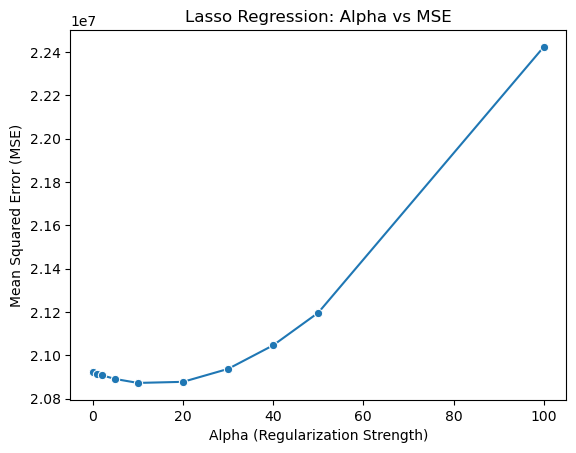

In [28]:
alphas = [0.001, 0.1, 1, 2, 5, 10, 20, 30, 40, 50, 100]
mses = []
for a in alphas:
    lasso_model = Lasso(alpha=a)
    lasso_model.fit(X_train, y_train)
    
    y_pred = lasso_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    
    print(f"MSE for alpha={a} : {mse}")
    mses.append(mse)

sns.lineplot(x=alphas, y=mses, marker="o")
plt.xlabel("Alpha (Regularization Strength)")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Lasso Regression: Alpha vs MSE")
plt.show()

In [16]:
from sklearn.metrics import r2_score
r2=r2_score(y_test, y_predict)
print("R-squared- ",r2)

R-squared-  0.8652571992774443


In [19]:
mse=mean_squared_error(y_test,y_predict)
print("mse_error:" ,mse)

mse_error: 20918648.88982561


In [32]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(mse)

20921803.698431373


In [33]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error
alphas = [0.001, 0.1, 1, 2, 5, 10, 20, 30, 40, 50, 100]
lasso_cv = LassoCV(
    alphas=alphas,
    cv=5,
    random_state=42
)

lasso_cv.fit(X_train, y_train)

# best alpha from the given list
best_alpha = lasso_cv.alpha_
print("✅ Best alpha (from given list):", best_alpha)

# prediction using same alpha
y_pred = lasso_cv.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print("✅ MSE using best alpha:", mse)


✅ Best alpha (from given list): 0.001
✅ MSE using best alpha: 20922599.871035963
